In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)
             
#engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [28]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

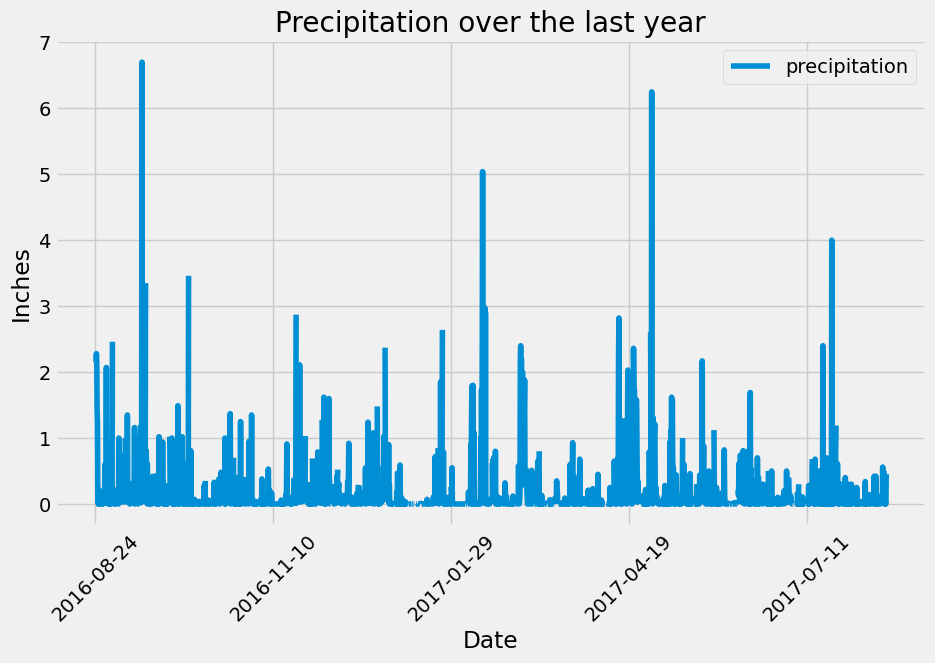

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(recent_date[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_ago = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
preci_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
preci_df = pd.DataFrame(preci_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
preci_df = preci_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
preci_df.plot(x='date', y='precipitation', figsize=(10, 6), title="Precipitation over the last year")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation =45)
plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
preci_summary = preci_df.describe()
preci_summary

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count 

[(9,)]

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0] [0]
temp_stats = session.query(func.min(Measurement.tobs),
                           func.avg(Measurement.tobs),
                           func.max(Measurement.tobs)).\
            filter(Measurement.station == most_active_station).all()

temp_stats

[(54.0, 71.66378066378067, 85.0)]

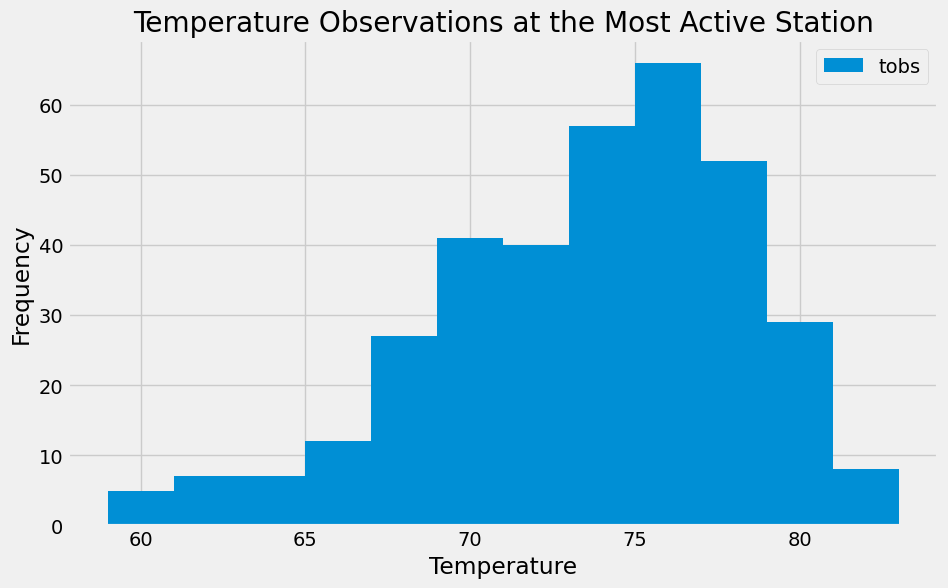

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
            filter(Measurement.station == most_active_station).\
            filter(Measurement.date >= one_year_ago).all()

# convert to dF
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])

tobs_df.plot.hist(bins=12, figsize=(10, 6), title="Temperature Observations at the Most Active Station")
plt.xlabel("Temperature")
plt.show()


# Close Session

In [24]:
# Close Session
session.close()